# McDonalds market segmentation

## Imports

In [1]:
import pandas as pd
import numpy as np
import plotly
import plotly.express as px
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

## Data Cleaning

In [2]:
df = pd.read_csv('mcdonalds.csv')
cmap = LinearSegmentedColormap.from_list("custom", [(28/255, 84/255, 45/255), (255/255, 224/255, 0/255)], N=54) # variable color gradient
custom_order = ['Never', 'Once a year', 'Every three months', 'Once a month', 'Once a week', 'More than once a week']
#print(df.Like.mean()) # Display average and median likes
#print(df.Like.median())

def desc(df):
    # Returns the functions head info and describe of pandas to have a global view of what the DF contains.
    print(df.head())
    print(df.info())
    print(df.describe())

def missingValues(df):
    # Use the isna() function to check whether any columns contain empty values
    total = 0
    for i in df.columns:
        missing_count = df[i].isna().sum()
        total += missing_count
        if missing_count != 0:
            print(f'{i} : {missing_count} missing values.')
    print('Total : ' + str(total) + ' missing values')

def aberrantValuesCheck(df):
    # Check for columns containing outliers
    for i in df.columns:
        print(df[i].unique())
        try:
            plt.boxplot(df[i])
            plt.title(i)
        except:
            continue

def cleanLikes(df):
    # Cleans up liking data by formatting values and converting them to int
    df['Like']= df['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})
    try:
        df['Like']= df['Like'].astype(int)
    except ValueError:
        print("Erreur de conversion")
        
def floatConversion(df):
    # Converts Yes / No to 1 / 0 respectively
    for i in ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']:
        df[i].replace({'No': int(0), 'Yes': int(1)}, inplace=True)
        


### Missing values

Using the missingValues() function, we notice that all columns are filled, so we can work on this dataset without worrying about empty data.

Total : 0 missing values  

### Outliers

Using the outlierValuesCheck() function, we can see that the data indicated in each column is consistent and plausible: 

['No' 'Yes'] - ['Yes' 'No'] - ['No' 'Yes'] - ['Yes' 'No'] - ['No' 'Yes'] - ['Yes' 'No'] - ['Yes' 'No'] - ['No' 'Yes'] - ['Yes' 'No'] - ['No' 'Yes'] - ['No' 'Yes']  
['-3' '+2' '+1' '+4' 'I love it!+5' 'I hate it!-5' '-2' '+3' '0' '-4' '-1']  
['Every three months' 'Once a week' 'Once a month' 'Once a year'
 'More than once a week' 'Never']  
['Female' 'Male']  

The first 11 columns are well filled with “Yes” or “No”, the scores go from -5 to +5, the attendance from “More than once a week” to “Never”, we also have the 2 genders “Male” and “Female”.

As for the ages, we can see from the boxplot that the distribution seems realistic, since we don't have any implausible values (such as a negative age or an age greater than 100, for example).


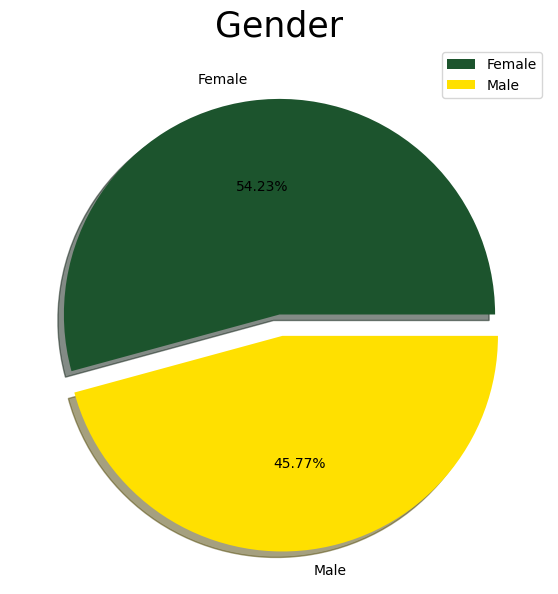

In [3]:
### Variables
labels = ['Female', 'Male']
size = df['Gender'].value_counts()
colors = ['#1c542d', '#ffe000']
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (7, 7)

### Computing
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')

### Presentation
plt.title('Gender', fontsize = 25)
plt.legend()
plt.show()

c:\Users\cleme\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cleme\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cleme\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cleme\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

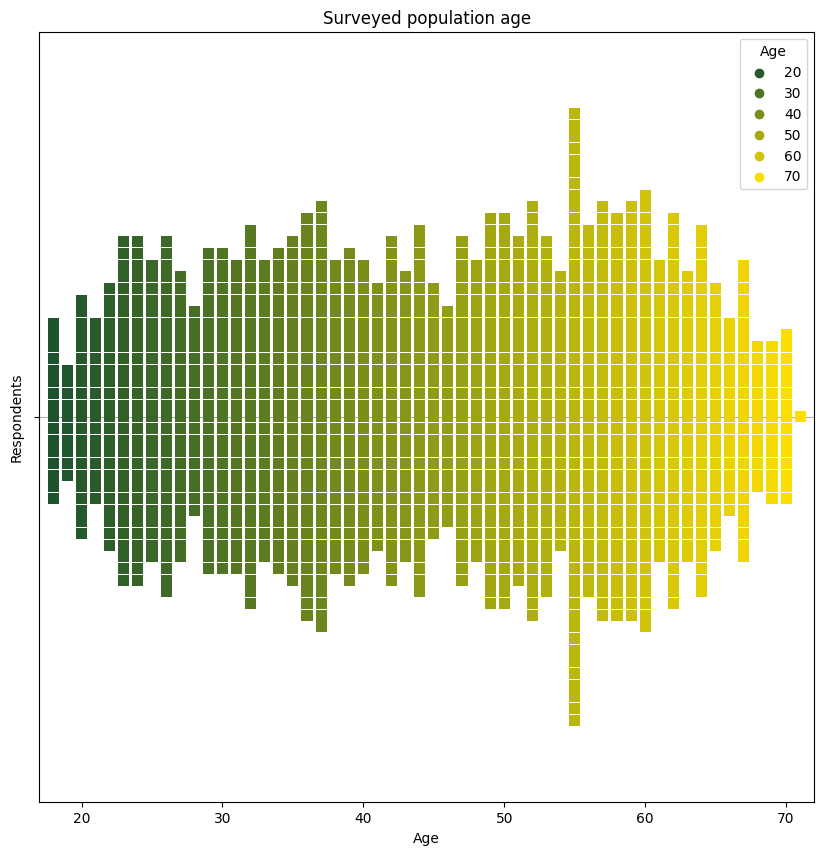

In [5]:
### Variables
data = df['Age']
mini = df['Age'].min()
maxi = df['Age'].max()
plt.rcParams['figure.figsize'] = (10, 10)

### Computing
sns.swarmplot(x=data, hue=data, palette=cmap, size=8, marker='s', alpha=1)

### Presentation
plt.xlabel('Age')
plt.ylabel('Respondents')
plt.title('Surveyed population age')
plt.xlim(mini - 1, maxi + 1)
plt.grid(axis='y')
plt.show()

c:\Users\cleme\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cleme\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cleme\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cleme\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

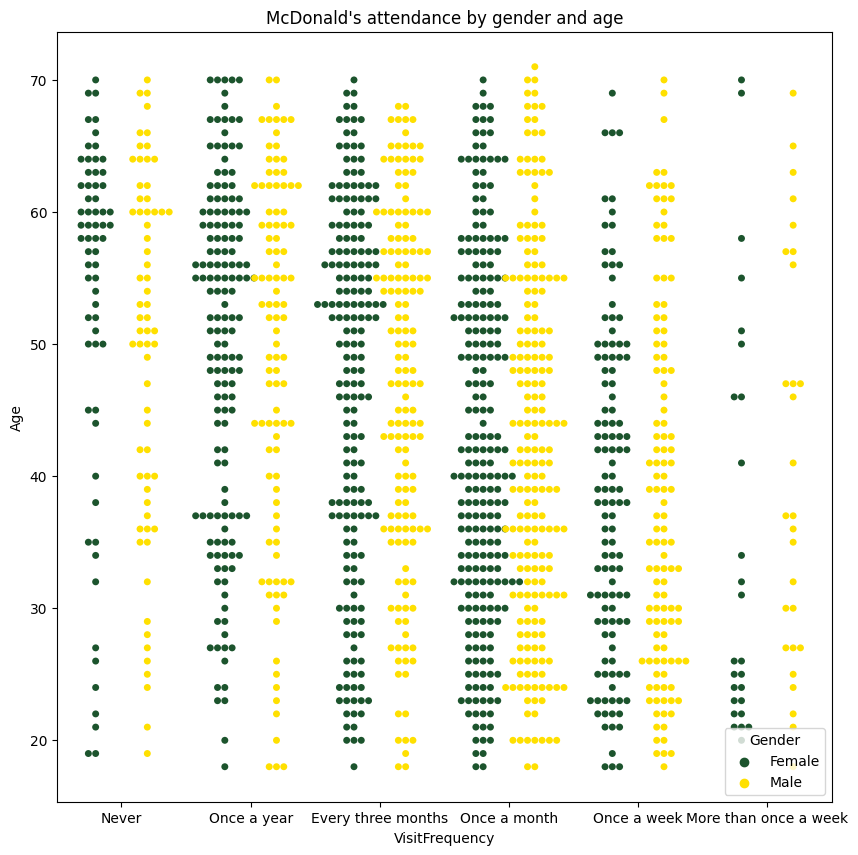

In [6]:
### Variables 
plt.rcParams['figure.figsize'] = (10, 10)
colors = ['#1c542d', '#ffe000']

### Computing
sns.swarmplot(x="VisitFrequency", y="Age", data=df, hue="Gender", palette=colors, order=custom_order, dodge=True)

### Presentation
plt.title("McDonald's attendance by gender and age")
plt.show()


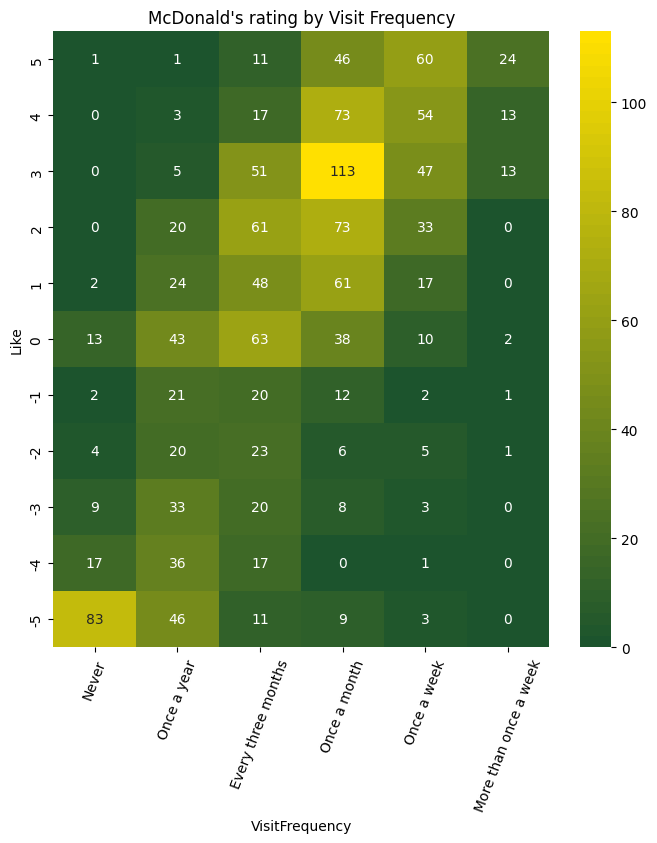

In [7]:
### Cleaning 
cleanLikes(df)

### Variables 
plt.rcParams['figure.figsize'] = (8, 8)

### Computing
cross_tab = pd.crosstab(df['Like'], df['VisitFrequency']).reindex(columns=custom_order)
sns.heatmap(data=cross_tab, annot=True, fmt='d', cmap=cmap)

### Presentation
plt.gca().invert_yaxis()
plt.xticks(rotation=69)
plt.title("McDonald's rating by Visit Frequency")
plt.show()

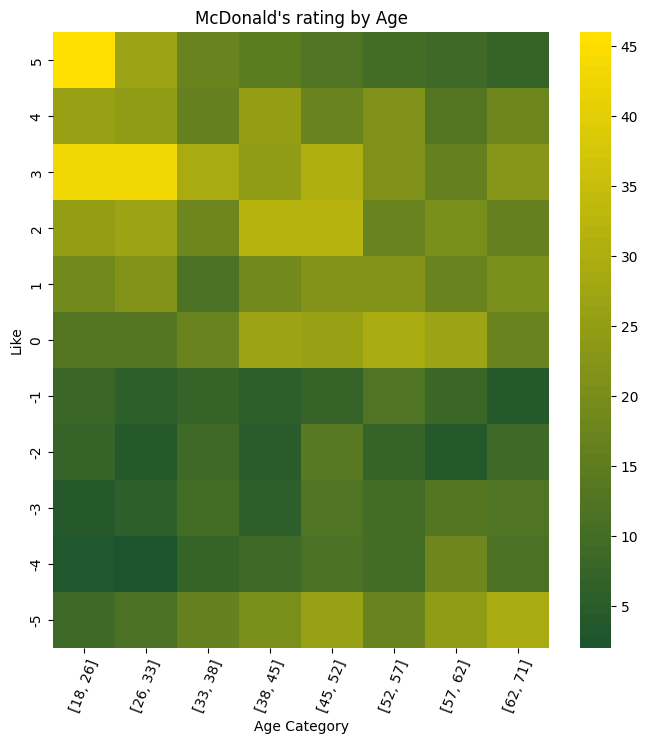

In [8]:
### Cleaning 
cleanLikes(df)
# Function to categorize ages into 10 groups
num_categories = 8

# Use qcut to create categories with roughly the same number of people
df['Age Category'], age_intervals = pd.qcut(df['Age'], q=num_categories, labels=False, retbins=True)
xLabels = []

for i, interval in enumerate(zip(age_intervals[:-1], age_intervals[1:])):
    beginningInterval, endInterval = interval
    xLabels.append([int(beginningInterval), int(endInterval)])

### Variables 
plt.rcParams['figure.figsize'] = (8, 8)

### Computing
cross_tab = pd.crosstab(df['Like'], df['Age Category'])

# Set the x-axis labels using the age intervals
sns.heatmap(data=cross_tab, annot=False, fmt='d', cmap=cmap, xticklabels=[f"{i}" for i in xLabels])

### Presentation
plt.gca().invert_yaxis()
plt.xticks(rotation=69)  
plt.title("McDonald's rating by Age")
plt.show()


In [ ]:
### Calculation of the correlation coefficient between visit frequency and age
frequency_mapping = {'Never': 1, 'Once a year': 2, 'Every three months': 3,
                      'Once a month': 4, 'Once a week': 5, 'More than once a week': 6}
df['VisitFrequencyNumeric'] = df['VisitFrequency'].map(frequency_mapping)

# Correlation calculation
correlation_age_visit = df['Age'].corr(df['VisitFrequencyNumeric'])
print(f"Correlation coefficient between age and visit frequency : {correlation_age_visit}")

In [ ]:
### Calculation of correlation coefficient between scores and age
rating_mapping = {'-5': -5, '-4': -4, '-3': -3, '-2': -2, '-1': -1,
                  '0': 0, '+1': 1, '+2': 2, '+3': 3, '+4': 4, 'I love it!+5': 5, 'I hate it!-5': -5}
df['RatingNumeric'] = df['Like'].map(rating_mapping)

# Correlation calculation
correlation_age_rating = df['Age'].corr(df['RatingNumeric'])
print(f"Correlation coefficient between age and score : {correlation_age_rating}")


C:\Users\cleme\AppData\Local\Temp\ipykernel_2660\1998805213.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '50.58479532163743' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  result.loc[visit_frequency] = result.loc[visit_frequency] / visit_frequency_counts[visit_frequency] * 100
C:\Users\cleme\AppData\Local\Temp\ipykernel_2660\1998805213.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '95.02923976608187' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  result.loc[visit_frequency] = result.loc[visit_frequency] / visit_frequency_counts[visit_frequency] * 100
C:\Users\cleme\AppData\Local\Temp\ipykernel_2660\1998805213.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '9.941520467836257

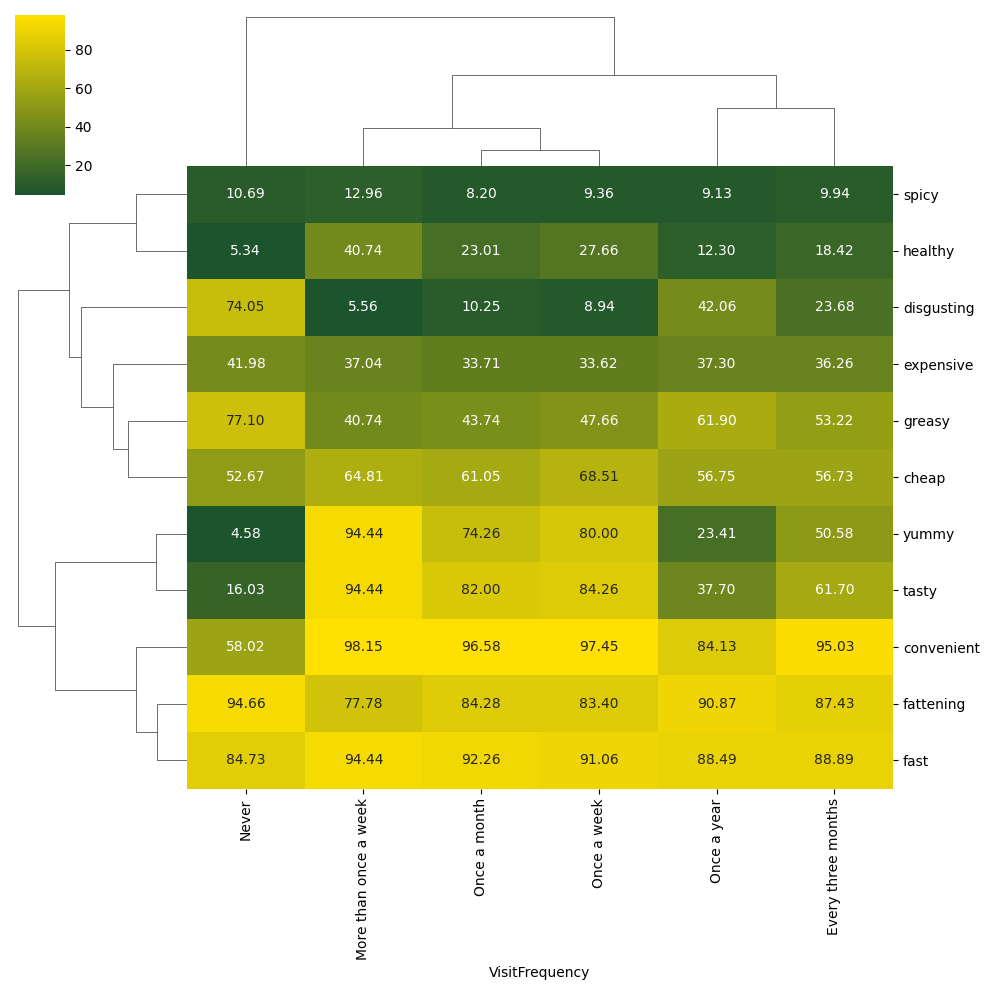

<Figure size 1000x800 with 0 Axes>

In [9]:
### Cleaning 
cleanLikes(df)
floatConversion(df)

### Variables
sub_df = df[['VisitFrequency', 'yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']]
visit_frequency_counts = sub_df['VisitFrequency'].value_counts()
result = sub_df.groupby('VisitFrequency').sum()

### Computing
for visit_frequency in result.index:
    result.loc[visit_frequency] = result.loc[visit_frequency] / visit_frequency_counts[visit_frequency] * 100
result = result.transpose()
result = result.reindex(columns = custom_order)
sns.clustermap(result, annot=True, cmap=cmap, fmt=".2f")

### Presentation
plt.figure(figsize=(10, 8))
plt.show()

C:\Users\hxpul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
C:\Users\hxpul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


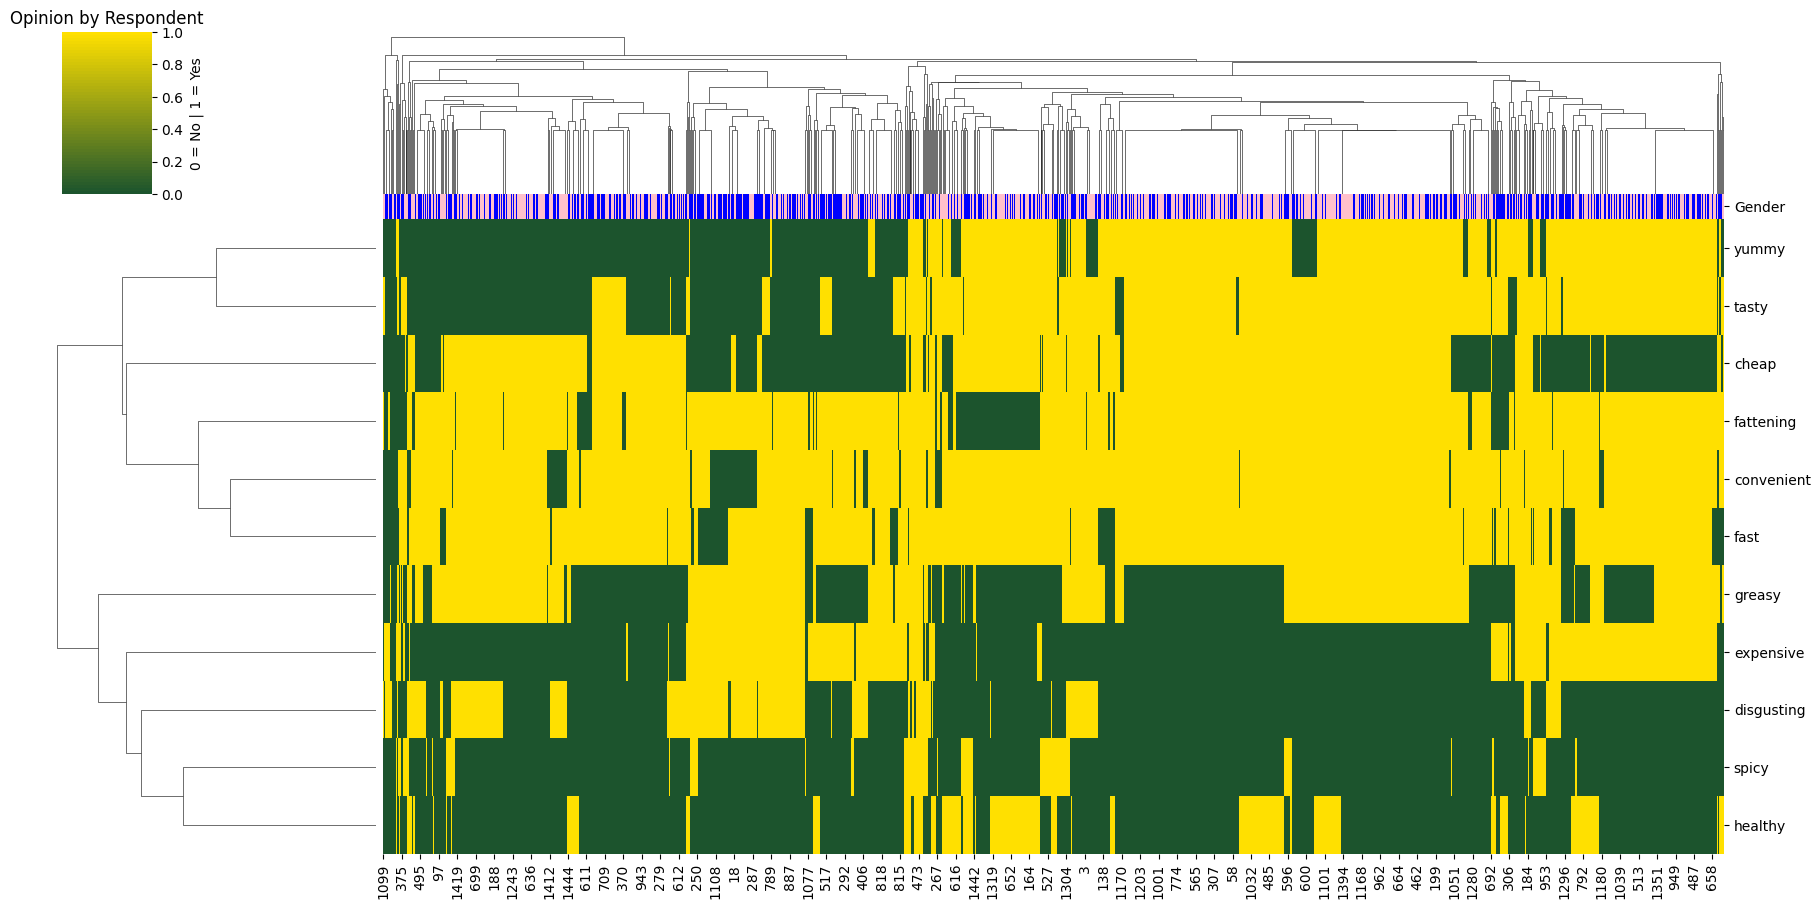

In [9]:
### Variables
plt.rcParams['figure.figsize'] = (25, 25)
sub_df = df[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']]
gender_colors = {'Female': 'pink', 'Male': 'blue'}

### Computing 
sub_df = sub_df.transpose()
colors = df['Gender'].map(gender_colors)
sns.clustermap(sub_df, cmap=cmap, fmt=".2f", figsize=(18, 9), col_colors=colors)

### Presentation
plt.ylabel('0 = No | 1 = Yes')
plt.title('Opinion by Respondent')
plt.show()

c:\Users\cleme\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cleme\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cleme\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cleme\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

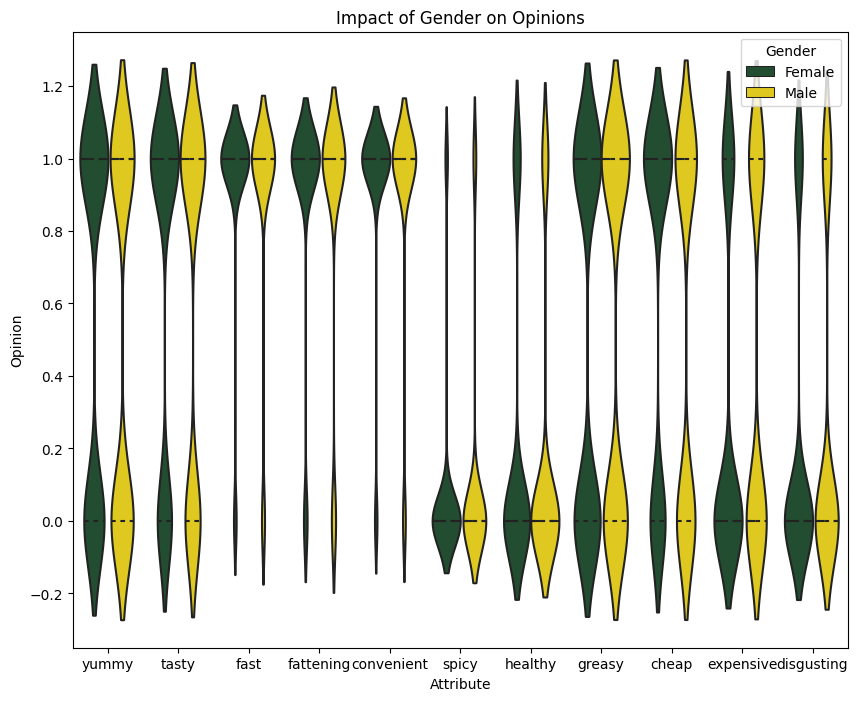

In [12]:
### Variables
columns_to_include = ['yummy', 'tasty', 'fast', 'fattening', 'convenient', 'spicy', 'healthy', 'greasy', 'cheap', 'expensive', 'disgusting']

plt.figure(figsize=(10, 8))

### Computing
df_melted = df.melt(id_vars=['Gender'], value_vars=columns_to_include, var_name='Attribute', value_name='Value')
sns.violinplot(x='Attribute', y='Value', hue='Gender', data=df_melted, inner='quart', palette=['#1c542d', '#ffe000'])

### Presentation
plt.xlabel('Attribute')
plt.ylabel('Opinion')
plt.title('Impact of Gender on Opinions')
plt.show()

c:\Users\cleme\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cleme\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


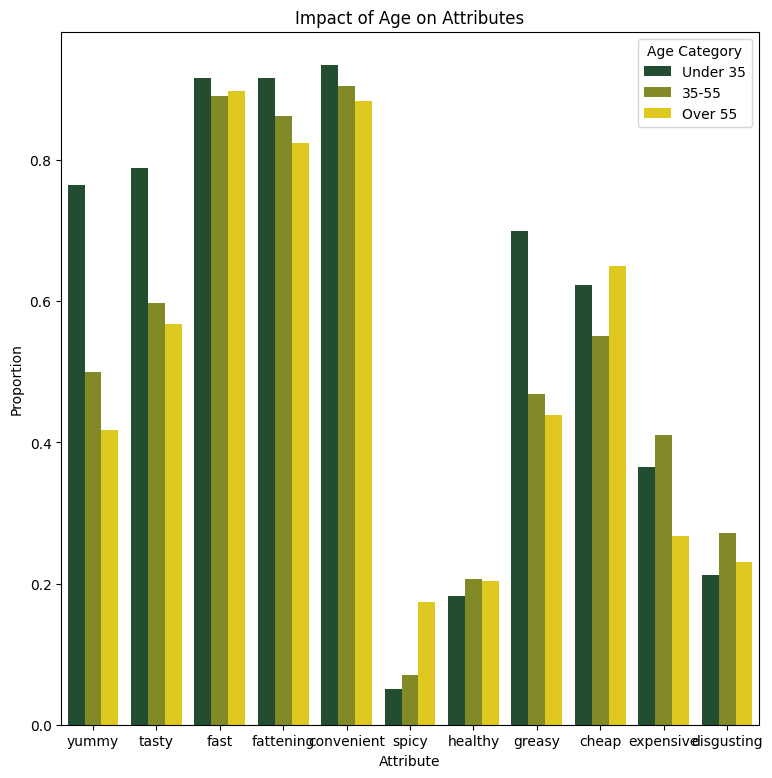

In [13]:
### Variables
plt.figure(figsize=(9, 9))
columns_to_include = ['yummy', 'tasty', 'fast', 'fattening', 'convenient', 'spicy', 'healthy', 'greasy', 'cheap', 'expensive', 'disgusting']
legend_order = ['Under 35', '35-55', 'Over 55']

### Computing
def categorize_age(age):
    if age > 55:
        return 'Over 55'
    elif 35 <= age <= 55:
        return '35-55'
    else:
        return 'Under 35'
df['Age Category'] = df['Age'].apply(categorize_age)
df_melted = df.melt(id_vars=['Age Category'], value_vars=columns_to_include, var_name='Attribute', value_name='Value')
order = list(reversed(df['Age Category'].unique()))
sns.barplot(x='Attribute', y='Value', hue='Age Category', data=df_melted, errorbar=None, palette=['#1c542d', '#8E9A17', '#ffe000'], order=columns_to_include, hue_order=order)
handles, labels = plt.gca().get_legend_handles_labels()
label_to_handle = {label: handle for label, handle in zip(labels, handles)}
custom_handles = [label_to_handle[label] for label in legend_order]

### Presentation
plt.xlabel('Attribute')
plt.ylabel('Proportion')
plt.title('Impact of Age on Attributes')
plt.legend(custom_handles, legend_order, title='Age Category')
plt.show()